In [62]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv("Salary.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.shape    

(30, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [13]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [14]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [53]:
df['log_YearsEperience']= np.log(df['Salary'])

<AxesSubplot:ylabel='Frequency'>

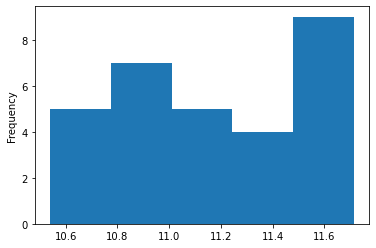

In [83]:
df['log_YearsEperience'].plot.hist(bins = 5)

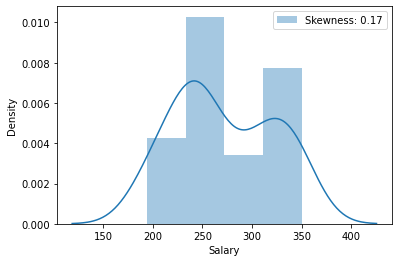

In [84]:
Sqrt_df = df["Salary"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_df,label="Skewness: %.2f"%(Sqrt_df.skew()) )
t.legend()

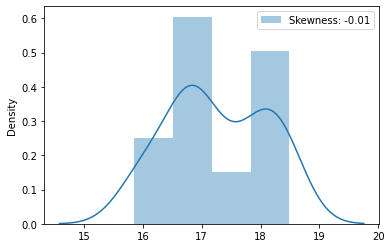

In [85]:
Boxcox_Salary = df["Salary"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Salary= stats.boxcox(Boxcox_Salary)
Boxcox_Salary= pd.Series(Boxcox_Salary[0])
t=sns.distplot(Boxcox_Salary,label="Skewness: %.2f"%(Boxcox_Salary.skew()) )
t.legend()

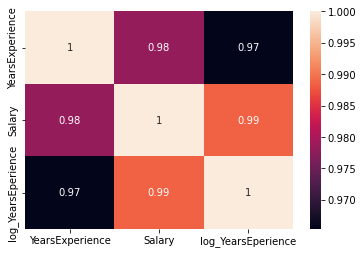

In [86]:
sns.heatmap(df.corr(),annot=True)
plt.show()

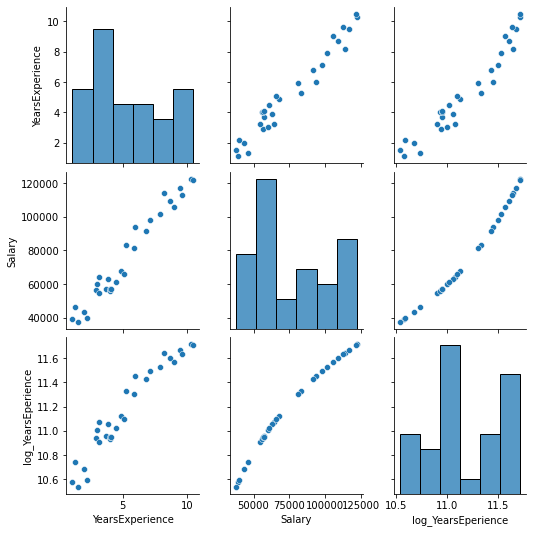

In [87]:
sns.pairplot(df)
plt.show()

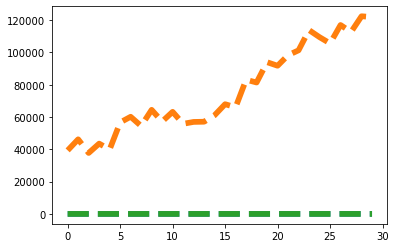

In [88]:
plt.plot(df, linestyle = '--', linewidth='5.7')

plt.show()

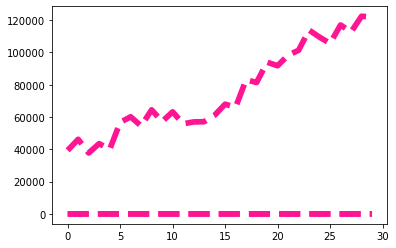

In [89]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

plt.show()

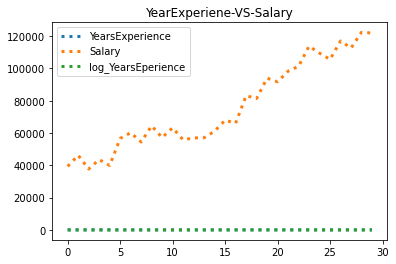

In [90]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

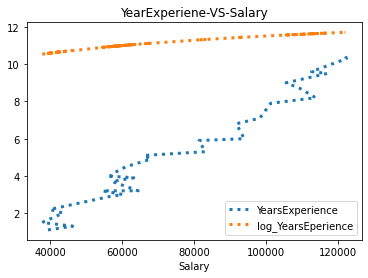

In [91]:
df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

In [92]:
X=df.drop('Salary',axis=1)

In [93]:
y=df.Salary

In [94]:
X.head()

,YearsExperience,log_YearsEperience
0,1.1,10.580073
1,1.3,10.740843
2,1.5,10.538237
3,2.0,10.681091
4,2.2,10.593906


In [95]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [98]:
print(X_train.shape)

(21, 2)


In [99]:
X_test.shape

(9, 2)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
LR=LinearRegression()

In [102]:
LR.fit(X_train,y_train)

LinearRegression()

In [103]:
LR.intercept_

-528771.93793568

In [104]:
LR.coef_        

array([ 2617.7750368 , 52856.11172275])

In [105]:
y_pred=LR.predict(X_test)

In [106]:
y_pred

array([ 32164.97359271, 117399.23141003,  60853.05200661,  65727.04467795,
       112910.00076768, 107294.78519173, 111176.11964961,  59385.89219637,
        83838.09791718])

In [107]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
Name: Salary, dtype: float64

In [108]:
from sklearn import metrics

In [109]:
R2=metrics.r2_score(y_test,y_pred)

In [110]:
R2

0.9860782865645241

In [111]:
print(metrics.mean_absolute_error(y_test,y_pred))

3203.8862429285914


In [112]:
print(metrics.mean_squared_error(y_test,y_pred))

12561515.771835525


In [113]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3544.222872765696


In [115]:
error= y_test-y_pred

In [116]:
error

2     5566.026407
28    4991.768590
13   -3772.052007
10   -2509.044678
26    4058.999232
24    2136.214808
27    1458.880350
11   -3591.892196
17    -750.097917
Name: Salary, dtype: float64

In [117]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

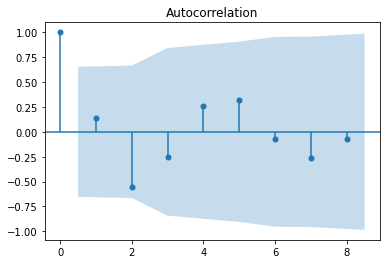

In [118]:
acf=plot_acf(error)
plt.show()

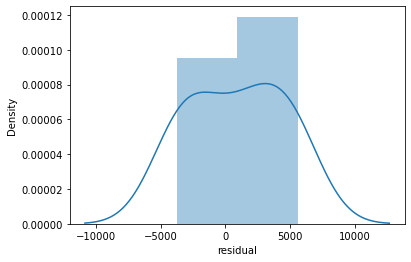

In [119]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

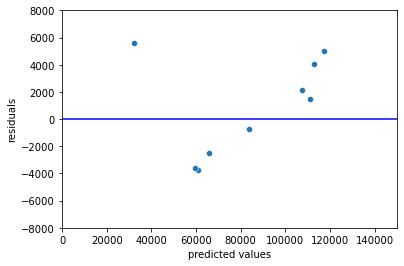

In [121]:
sns.scatterplot(x=y_pred,y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot([0,150000],[0,0],color='blue')
plt.show()

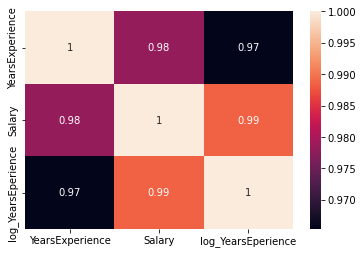

In [82]:
sns.heatmap(df.corr(),annot=True)
plt.show()